## Checkpoint 5

### Aim 

To write two Python programs to numerically analyse the path of a projectile under gravity and drag force. There are two tasks, one to display the trajectory and the second to display the relation between final kinetic energy and launch angle.

### Numerical Integration

In this checkpoint we will use the simplest numerical integration technique called First Order Euler. This involves iteratively calculating the position and velocity at a set of times $t_i$=iΔt for i=0,1,2,… where we assume that the position and velocity at time $t_{i+1}$ depend only on the position and velocity at time $t_i$. In particular if at time $t_i$ the particle has 

$$\text{Position} = \vec{x}_i$$

$$\text{Velocity} = \vec{v}_i$$

$$\text{Acceleration} = \vec{a}_i$$

then at time $t_{i+1}=t_i+Δt$ the position and velocity of the particle can be approximated by

$$\vec{x}_{i+1} = \vec{x}_i+Δt\vec{v}_i$$

$$\vec{v}_{i+1} = \vec{v}_i+Δt\vec{a}_i$$

So if we start at time $t_0=0$ at position $\vec{x}_0$ and velocity $\vec{v}_0$, then provided we can calculate the force on the particle, and hence the acceleration $\vec{a}_i$, and use small enough time steps Δt, we can iteratively trace out the path by repeated use of the above relations.

### Forces on Particle

![ch5.png](ch5.png)  
If we consider a particle of mass m travelling with velocity $\vec{v}$ subject to gravity and drag from a fluid as shown below, then the drag force is given by

$$ \vec{F}_d=−\frac{1}{2}\rho AC_Dv^2\hat{v}$$

where $\rho$ is the density of the fluid, A is the cross-sectional area of the particle, $C_D$ is the drag coefficient and $\hat{v}=\vec{v}/|v|$, being the unit vector in the direction of the velocity.


Thus the acceleration of of the particle is given by $\vec{a}=\frac{1}{m}\vec{F}_d−g\hat{j}$ where g is acceleration due to gravity, being 9.81 $ms^{−2}$. We can write this as:

$$ \vec{a} =−\beta v^2\hat{v}−g\hat{j}$$  

where $\beta=\frac{\rho AC_D}{2m}$, where $\beta$ is the normalised drag coefficient for the system.

In this problem the position, velocity and acceleration are all two dimensional vectors so they have a horizontal and vertical component that you have to treat separately in the calculation.

So in terms of components in x (horizontal) and y (vertical) we can write:
$\vec{x}=(xx,xy); \vec{v}=(vx,vy); \vec{a}=(ax,ay)$

where the components of acceleration from the above equations are:
$a_x=−\beta vv_x$ and $a_y=−\beta vv_y−g$
where v is the magnitude of the velocity, so being $v=\sqrt{v^2_x+v^2_y}$


### Task

**Task 1:** Write a Python program to plot out the trajectory of a projectile starting at position $\vec{x}_0=(0,0)$ for specified initial velocity and normalised drag coefficient. You program should prompt for
- Magnitude of the initial velocity $v_0$ in $ms^{−1}$.
- Angle θ from the horizontal of initial velocity in degrees.
- β the normalised drag coefficient.
- Δt the step interval in seconds.

The path should be traced and displayed using Matplotlib from the inital starting position until the particle re-crosses the x-axis. Your graph should have a suitable title and axis labels. Your program should also print the range of the projectile to the terminal.

Test your program with:

- Case 1: $v_0 = 10 ms^{−1}$, $\theta=45^{\circ}$, $\beta$=0.02, $\Delta t$=0.001
- Case 2: $v_0 = 10 ms^{−1}$, $\theta=60^{\circ}$, $\beta$=0.3,  $\Delta t$=0.001

**Task 2:** Modify the above program to produce a plot of the ratio of final kinetic energy to initial kinetic energy against lauch angle θ in the range $0 \to 90^{\circ}$. Your program should prompt for :

- Initial velocity $v_0$.
- Normalised drag coefficient $\beta$.
- Timestep $\Delta t$.

and plot out, using Matplotlib, a graph of $K_f / K_i$ against $\theta$.


### Checkpoint

- To help you with this checkpoint we've already provided you with a program skeleton structure below.
- Test your program with the following conditions: 
    - Case 1: $v_0 = 10 ms^{−1}$, $\beta$=0.02, $\Delta t$=0.001
    - Case 2: $v_0 = 10 ms^{−1}$, $\beta$=0.3,  $\Delta t$=0.001
- Call a demonstrator, show them your code, and run your programs for the two different conditions.

### Assessment

To pass this checkpoint:
- At least one of the progammes works fully with the supplied test examples.
- A good attempt has been made for the second program.
- The output graphs have the correct title and labels and the code is well structured with sensible use of functions called from the main() function.
- There are sensible header comments and sufficient in-line comments to explain the operation.

### Next steps
Once you have completed this checkpoint, please continue with the [Week5](../WeeklyTasks/Week5.ipynb) tasklist.


Trajectory for (v0, theta, beta, delta_t) = (10.0 m/s, 60.0°, 0.3, 0.001 s)
Range of the projectile: 2.88 meters


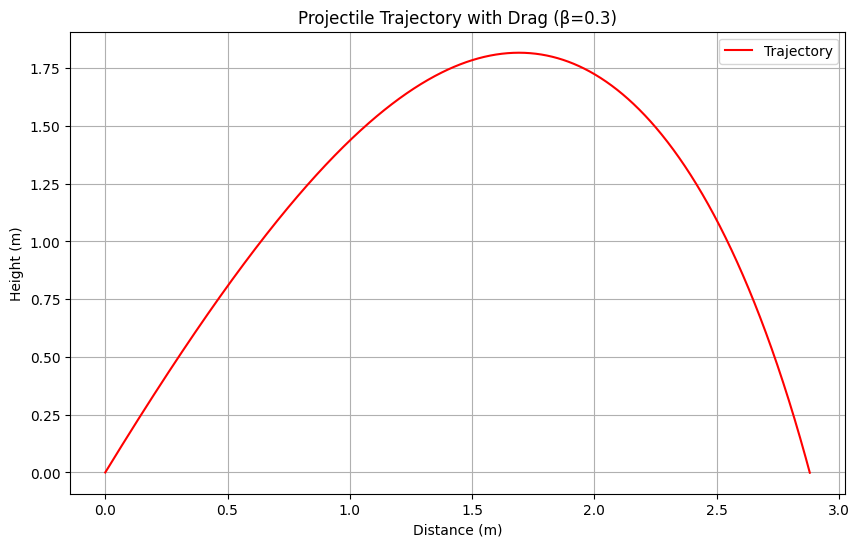

In [2]:
### Task 1 - plotting the trajectory

# Define here your imports
import math
import matplotlib.pyplot as plt

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)

def set_initial(v_initial, theta_deg):
    """
    Set initial conditions based on initial velocity and launch angle.
    
    Parameters:
    - v_initial: Initial velocity (m/s)
    - theta_deg: Launch angle (degrees)
    
    Returns:
    - x, y: Initial positions (m)
    - vx, vy: Initial velocity components (m/s)
    """
    theta_rad = math.radians(theta_deg)
    vx = v_initial * math.cos(theta_rad)
    vy = v_initial * math.sin(theta_rad)
    x = 0.0
    y = 0.0
    return x, y, vx, vy

def acceleration(vx, vy, beta):
    """
    Parameters:
    - vx: Velocity in x-direction (m/s)
    - vy: Velocity in y-direction (m/s)
    - beta: Normalized drag coefficient
    
    Returns:
    - ax, ay: Acceleration components (m/s^2)
    """
    v = math.sqrt(vx**2 + vy**2)
    if v == 0:
        ax = 0
        ay = -g
    else:
        ax = -beta * v * vx
        ay = -g - beta * v * vy
    return ax, ay

def step_forward(x, y, vx, vy, beta, delta_t):
    
    ax, ay = acceleration(vx, vy, beta)
    # Update velocity
    new_vx = vx + ax * delta_t
    new_vy = vy + ay * delta_t
    # Update position
    new_x = x + vx * delta_t
    new_y = y + vy * delta_t
    return new_x, new_y, new_vx, new_vy

def Checkpoint5_1(v_initial, theta, beta, delta_t):
    """
    Main program to simulate projectile motion and plot trajectory.
    """
    print("Trajectory for (v0, theta, beta, delta_t) = ({0} m/s, {1}°, {2}, {3} s)".format(v_initial, theta, beta, delta_t))
    
    # Initialize variables
    t = 0.0
    x, y, vx, vy = set_initial(v_initial, theta)
    
    # Lists to store trajectory points
    x_values = [x]
    y_values = [y]
    
    # Simulation loop
    while y >= 0.0:
        x, y, vx, vy = step_forward(x, y, vx, vy, beta, delta_t)
        x_values.append(x)
        y_values.append(y)
        t += delta_t
    
    # Estimate range using linear interpolation for better accuracy
    if len(y_values) >= 2 and y_values[-2] != y_values[-1]:
        x_last = x_values[-2]
        y_last = y_values[-2]
        x_final = x_values[-1]
        y_final = y_values[-1]
        # Linear interpolation to find exact x where y=0
        range_projectile = x_last + (0 - y_last) * (x_final - x_last) / (y_final - y_last)
    else:
        range_projectile = x_values[-1]
    
    print("Range of the projectile: {:.2f} meters".format(range_projectile))
    
    # Plotting the trajectory
    plt.figure(figsize=(10,6))
    plt.plot(x_values, y_values, "r", label='Trajectory')          # Plot in red
    plt.title("Projectile Trajectory with Drag (β={})".format(beta))       # Add title
    plt.xlabel("Distance (m)")
    plt.ylabel("Height (m)")
    plt.grid(True)
    plt.legend()
    plt.show()

def main():
    """
    Main function to execute the program interactively.
    """
    # Run interactively
    try:
        v_initial = float(input("Enter initial velocity v0 (m/s): "))
        theta = float(input("Enter launch angle θ (degrees): "))
        beta = float(input("Enter normalized drag coefficient β: "))
        delta_t = float(input("Enter timestep Δt (s): "))
    except ValueError:
        print("Invalid input. Please enter numerical values.")
        return
    
    Checkpoint5_1(v_initial, theta, beta, delta_t)

if __name__ == "__main__":
    main()


K_f/K_i ratios for (v0, beta, delta_t) = (10.0, 0.3, 0.001)


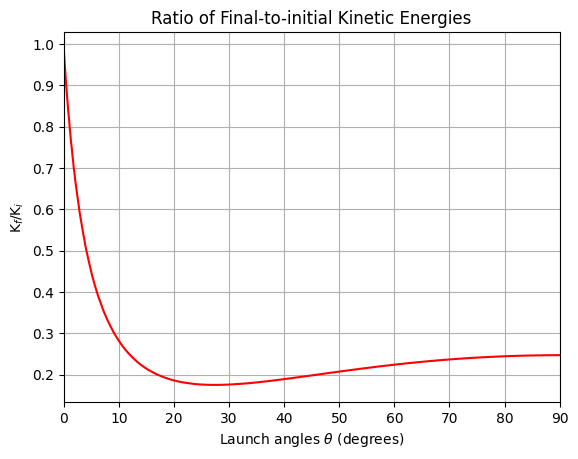

In [4]:
# Task 2 - ratio of kinetic energies
def kinetic_energy(v):
    k_e = 0.5 * v**2
    return k_e
    ### Calculate kinetic energy per mass

def Checkpoint5_2(v_initial, beta, delta_t):
    print("K_f/K_i ratios for (v0, beta, delta_t) = ({0}, {1}, {2})".format(v_initial, beta, delta_t))
    
    # Control resolution for angle input (total # calculations = 90 * angle_res)
    angle_res = 10  # Defines step size: higher value means smaller steps
    
    thetas = []        # List to store launch angles
    ke_ratios = []     # List to store Kf/Ki ratios
    
    # Scan all launch angles theta from 0 to 90 degrees
    for theta_step in range(90 * angle_res + 1):
        theta = theta_step / angle_res  # Convert step to angle in degrees
        thetas.append(theta)
        
        # Initialize projectile state
        x, y, vx, vy = set_initial(v_initial, theta)
        
        # Simulate projectile motion until it crosses the x-axis (y < 0)
        while y >= 0.0:
            x, y, vx, vy = step_forward(x, y, vx, vy, beta, delta_t)
        
        # Calculate final velocity magnitude
        final_v = math.sqrt(vx**2 + vy**2)
        
        # Calculate kinetic energies
        Kf = kinetic_energy(final_v)  # Final kinetic energy per unit mass
        Ki = kinetic_energy(v_initial)  # Initial kinetic energy per unit mass
        
        # Calculate ratio Kf/Ki
        ratio = Kf / Ki
        ke_ratios.append(ratio)
    
    #Plot graph
    plt.plot(thetas, ke_ratios,"r")          # Plot in red
    plt.title("Ratio of Final-to-initial Kinetic Energies")       # Add title/lables
    plt.xlabel(r'Launch angles $\theta$ (degrees)')
    plt.ylabel(r'K$_f$/K$_i$')
    plt.xlim(0,90)
    plt.grid()
    plt.show() 

#Run interactively
v_initial = float(input("v0 (initial velocity) : "))
beta = float(input("beta (drag coefficient) : "))
delta_t = float(input("timestep (delta_t) : "))
Checkpoint5_2(v_initial, beta, delta_t)